# Reliability Analysis Introduction

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Solution</b>
    
Only the solution and the explanations are included here; see the assignment document for the complete questions. All code blocks are retained so that you can still run the notebook locally.

Note: unlike HW2, this assignment is not connected to the workshop in class during week 3. It is meant to introduce you to structural reliability concepts, which we will continue with in weeks 4, 5 and 6.
</p>
</div>


<div style="background-color:#FFA500; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>OpenTURNS</b>
    
Some of the questions in this assignment are illustrated using Python code in two ways: 1) using the `scipy` stack and 2) using a package called [OpenTURNS](http://openturns.github.io/). The code that illustrates the answer that you should have come up with is labeled "what you should have done."
    
The package OpenTURNS will be discussed later in our course, and you will probably want to use it for your B Module assignments; the solution is provided here so that you can use it as a reference later. The package can be tricky to learn at furst, but it is very powerful. A tutorial for using it will be provided later, so you don't need to understand what is in the solution now. what you should have 
</p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import matplotlib.cm as cm

## Introduction


In [2]:
# Mean and standard deviation: R
mu_r = 8.76e5          # Mean
sigma_r = 1.41e5       # Standard deviation
cov_r = sigma_r/mu_r   # Coefficient of variation

# Mean and standard deviation: S
mu_s = 4.95e5  
sigma_s = 9.89e4 
cov_s = sigma_s/mu_s    

rho_rs = 0.1           # Correlation coefficient between R and S

**Question 1:** fill in the blank in the ``` distrib_parameters ``` function to test your understanding of the relation between the distribution parameters and the mean/std!   

In [3]:
def distrib_parameters(mean, std):     # Should be left blank and filled in by students
    ''' Computes the lognormal distribution parameters. 
    ---------------------------
    mean: float. Mean of the distribution.
    std: float. Standard deviation of the distribution.

    returns: 
    lam: float. First distribution parameter (mean of ln(X)).
    zeta: float. Second distribution parameter (std of ln(X)). 
    '''
    cov = std/mean                     # Coefficient of variation
    zeta = np.sqrt(np.log(1 + cov**2))   # Zeta parameter (std of ln(X))
    lam = np.log(mean) - 0.5*zeta**2     # Lambda parameter (mean of ln(X))
    return lam, zeta

To make sure that your results in the upcoming questions are sensible, you can run the function below to test your function's output.

In [4]:
def test_distrib_parameters(tolerance=1e-3):
    ''' Test function for distrib_parameters function. '''
    
    test_1 = distrib_parameters(8.76e5, 1.41e5)
    assert abs(test_1[0] - 13.6703) < tolerance, "Incorrect lambda value"
    assert abs(test_1[1] - 0.1599) < tolerance, "Incorrect zeta value"

    test_2 = distrib_parameters(4.95e5, 9.89e4)
    assert abs(test_2[0] - 13.0927) < tolerance, "Incorrect lambda value"
    assert abs(test_2[1] - 0.1978) < tolerance, "Incorrect zeta value"
    return None

*This is how you test the function with a default tolerance of `1e-3`:*

In [5]:
test_distrib_parameters()

In [6]:
class Random_Variable():
    ''' Create a random variable object following a Lognormal distribution. 
    ---------------------------
    Parameters:
    mean: float. Mean of the distribution (X, not ln(X))
    std: float. Standard deviation of the distribution (X, not ln(X))
    '''
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
        param = distrib_parameters(mean, std)
        self.lamda = param[0]
        self.zeta = param[1]
    
    def change_parameters(self, mean=None, std=None):
        ''' Change the mean, standard deviation of the distribution (or both).

        mean: float. Mean of the distribution (default: None). 
        std: float. Standard deviation of the distribution (default: None).
        '''
        if mean is not None:
            self.mean = mean
        if std is not None: 
            self.std = std
            
        param = distrib_parameters(mean, std)   # Update distribution parameters
        self.lamda = param[0]
        self.zeta = param[1]            

    def getDistributionParameters(self):
        return self.lamda, self.zeta

    def pdf(self, x):
        ''' Probability Density Function. 
        
        x: float. Value at which the PDF is evaluated.
        return: PDF evaluated in x.
        '''
        zeta = self.zeta
        lam = self.lamda
        return 1/(np.sqrt(2*np.pi)*zeta*x) * np.exp(-0.5*((np.log(x)-lam)/zeta)**2) 

**Question 2:** Use the ``` Random_Variable ``` class, you can create two RV objects: 

In [7]:
R = Random_Variable(mu_r, sigma_r)
S = Random_Variable(mu_s, sigma_s)

**Question 3:** Compute the correlation coefficient $\rho_{lnRlnS}$ between $ln(R)$ and $ln(S)$ (which will prove useful later on):

In [8]:
rho_ln_rs = 1/(R.zeta*S.zeta) * np.log(1 + rho_rs*cov_r*cov_s)

## Reliability problem formulation

**Question 4:** define the limit state function and the associated failure event.   

**Answer:**

$Z = R/S$ and failure is defined by $Z<1$.

To read more about the safety factor formulation, see ADK 4.2.4. 

## Analytic Solution


**Question 5:** compute the failure probability for the distributions and dependence structure presented previously.

**Answer**

We know from the previous section that $Z=R/S$. Then:

$ln(Z) = ln(R) - ln(S)$

However R and S are lognormally distributed, therefore $ln(R)$ and $ln(S)$ follow normal distributions  $\mathcal{N(\lambda_R, \zeta_R)}$ and $\mathcal{N}(\lambda_S, \zeta_S)$.

Given the properties of linear combinations of correlated normal random variables, $ln(Z) \sim \mathcal{N}(\lambda_Z, \zeta_Z)$ with :

$\lambda_Z = \lambda_R - \lambda_S = 5.78.10^4 $ and $\zeta_Z = (\zeta_R^2 + \zeta_S^2 - 2\rho_{ln R ln S}\zeta_R \zeta_S)^{1/2} = 2.41.10^4$.

The failure probability of the system is here defined by:

 $$Pr(Z<1) \Leftrightarrow Pr(ln(Z)<0)$$
 
Clearly then:

 $$p_f = Pr(ln(Z)<0) = \Phi(-\frac{\lambda_Z}{\zeta_Z}) = \Phi(-2.39) = 0.00842 $$ 
 
 using the standard normal probability table.

 **Note:** the calculations are presented below:

In [9]:
lamda_z = R.lamda - S.lamda
zeta_z = np.sqrt(R.zeta**2 + S.zeta**2 - 2*rho_ln_rs*R.zeta*S.zeta)
beta = -lamda_z/zeta_z
print(lamda_z, zeta_z, beta, st.norm.cdf(beta))

0.5775909286375374 0.24145261513041893 -2.3921502292512162 0.008374992381993698


## Monte Carlo Simulation

**Question 6:** implement Monte Carlo analysis to check your answer numerically from Question 5. You should write the code from scratch.

In [10]:
montecarlosize = 10000

### a. What you should have done

In [11]:
cov_matrix = np.array([[R.zeta**2, 2*rho_ln_rs*R.zeta*S.zeta],
                       [2*rho_ln_rs*R.zeta*S.zeta, S.zeta**2]])  # Define covariance matrix for ln(R) and ln(S)

# Random sample of values of ln(R) and ln(S) with the correct dependence structure (correlation)
sample = np.random.multivariate_normal([R.lamda, S.lamda], cov_matrix, montecarlosize) 

sample_ln_z = sample[:,0] - sample[:,1]

In [12]:
number_failures_1 = sum(i<0 for i in sample_ln_z)

pf_mc_manual = number_failures_1/montecarlosize

**Note:** Instead of defining samples of values of $R$ and $S$, which are lognormally distributed, samples of $ln(R)$ and $ln(S)$ (which are normally distributed) have proven easier to obtain. The failure criterion used in the MCS is therefore $ln(Z) = ln(R) - ln(S) <0$ rather than $Z = R/S$. 

### b. How to solve it with OpenTURNS

*The first time you run this you will probably need to use `pip install openturns`*

In [13]:
import openturns as ot
import openturns.viewer as viewer
ot.Log.Show(ot.Log.NONE)

In [14]:
r = ot.LogNormal(R.lamda, R.zeta)
s = ot.LogNormal(S.lamda, S.zeta)

cor_matrix = ot.CorrelationMatrix(2)   # About that?
cor_matrix[0,1] = rho_ln_rs
cor_matrix[1,0] = rho_ln_rs 

# Define bivariate normal copula with correlation rho:
bivar_copula = ot.NormalCopula(cor_matrix)

inputDistribution = ot.ComposedDistribution((r,s))
inputDistribution.setDescription(["r", "s"])
inputRandomVector = ot.RandomVector(inputDistribution)

myfunction = ot.SymbolicFunction(["r", "s"], ["r/s"])

outputvector = ot.CompositeRandomVector(myfunction,inputRandomVector)

In [15]:
outputSample = outputvector.getSample(montecarlosize)

number_failures_2 = sum(i < 1 for i in np.array(outputSample))[0]
pf_mc_ot = number_failures_2/montecarlosize

In [16]:
print("The failure probability obtained analytically is 0.00842")
print("The failure probability computed using the manual MCS implementation is {:.3f}".format(pf_mc_manual))
print("The failure probability computed using OpenTURNS is {:.3f}".format(pf_mc_ot))

The failure probability obtained analytically is 0.00842
The failure probability computed using the manual MCS implementation is 0.005
The failure probability computed using OpenTURNS is 0.010


**Question 7**: check your answers from Q5 and Q6---are they the same? If not, why?

**Answer**:

No, the numerical resuls are different than the analytic results. The analytic result (Q5) is the correct answer because it is exact; the numerical results are only approximations. As the sample size increase, MCS will get closer to the exact value. Try resampling and seeing how the calculated probabilities change for both numerical methods (note that OpenTURNS is "smart"...it won't update the sample, `outputSample`, unless you reset the value of `montecarlosize`).

The two MCS methods are also different. This could be because of the difference in samples, but also could be due to the way the distributions are implemented in OpenTURNS. Can you tell what it is? (Note: we didn't take the time to check, it's not that trivial to find out. If you really get curious about this one, come talk to Robert).

## Exploring Dependence


**Question 8:** implement the bivariate lognormal PDF in the Python function outlined below.

In [17]:
def bivariate_LN(R, S, rho, r, s):
    ''' Bivariate lognormal probability density function: general case.
     
    R, S: Random_Variable objects. 
    rho: float. Correlation coefficient between ln(R) and ln(S). 
    r, s: float. Values at which the PDF is evaluated.  
    '''
    lamda_r = R.lamda
    zeta_r = R.zeta
    lamda_s = S.lamda
    zeta_s = S.zeta
    
    arg_exp = -1/(2*(1-rho**2)) * (((np.log(r)-lamda_r)/zeta_r)**2 + ((np.log(s)-lamda_s)/zeta_s)**2 - 
                                   2*rho*((np.log(r)-lamda_r)/zeta_r)*((np.log(s)-lamda_s)/zeta_s))
    pdf = 1/(2*np.pi*zeta_r*zeta_s*np.sqrt(1-rho**2)*r*s) * np.exp(arg_exp)
    return pdf

### Bivariate PDF contours

**Question 9**: add a few lines to the code to plot the failure realizations from your random sample in the MSC above (Q6).

In [18]:
def plot_contour(bivar, xlim= None, ylim=None, nb_points=200):
    """ 
    Contour plot in the bivariate plane (X,Y).
    ---------------------
    bivar: bivariate distribution.
    xlim, ylim: tuple, list. Intervals of values of x and y displayed in the figure (default: None).
    nb_points: int. Size of the grid (default: 200).

    returns: matplotlib.pyplot Figure and Axis objects. 
    """
    f, ax = plt.subplots(1)

    if xlim is None:
         xlim = [R.mean - 3*R.std, R.mean + 3*R.std]
    if ylim is None:
         ylim = [S.mean - 3*S.std, S.mean + 3*S.std]

    x = np.linspace(xlim[0], xlim[1], nb_points)
    y = np.linspace(ylim[0], ylim[1], nb_points)
    X,Y = np.meshgrid(x,y)
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                if X[i,j]>0 and Y[i,j]>0:
                    pdf[i,j] = bivar(R, S, rho_ln_rs, X[i,j], Y[i,j])  

    

    

    ax.contour(X, Y, pdf, levels=8, cmap=cm.Blues)    # plot bivariate PDF contours
    ax.plot(x, x, label='LSF', color='k')             # plot LSF
    ax.fill_between(x, x, ylim[1], label='Failure domain', color='grey')   # fill failure domain

    # We want to extract MC realisations of failure               
    sample_bis = np.copy(sample_ln_z)
    sample_bis[sample_bis >= 0] = 0
    sample_bis[sample_bis < 0] = 1

    ax.scatter(np.exp(sample[:,0])*sample_bis, np.exp(sample[:,1])*sample_bis, label='MCS', 
               color='k', marker='+')  
    
    ax.set_aspect("equal")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(r"$R$")
    ax.set_ylabel(r"$S$")
    ax.legend()
    return f, ax 

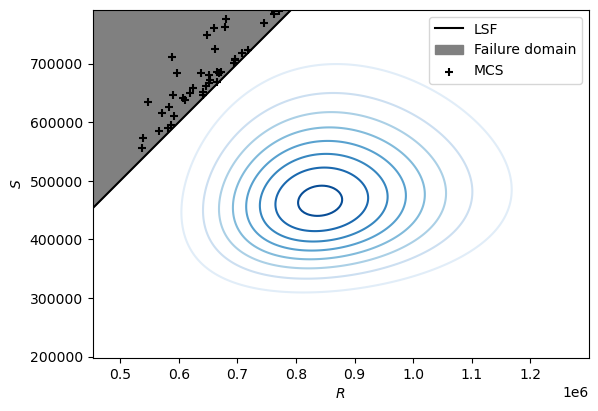

In [19]:
f, ax = plot_contour(bivariate_LN)

You can find several objects on the figure above.

The grey area corresponds to the failure domain, that is the region for which $R < S$. The black dots displayed in this region are the realisations simulated in your manual implementation of the Monte Carlso Simulation that correspond to a failure event. Finally, the blue concentric circular shapes correspond to the *contours* of the bivariate lognormal PDF you implemented in the previous question. Each point on the same 'level' (or circle) has the same density, that is the same likelihood of occurence.

Although the problem we considered was very simple, it represents one of the key types of analyses we will learn to use in this unit: a structural reliability calculation. We define a function of random variables and a failure condition (the limit-state function) and integrate over the failure domain to obtain the failure probability. Unfortunately, most of the problems we are interested in can't be solved analytically. In fact, when the limit-state function is computationally expensive to run (e.g., a finite element program), even Monte Carlo simulation because unfeasible.

We will learn more about these methods in Week 4. For now, try thinking about the following questions and discussing them with your classmates:  
1. What would happen if one of the random variables did not have the lognormal distribution?  
   1. How would the analytic calculation change?
   2. What would be different in the Monte Carlo simulation?
   3. How would the probability density contours change?
2. What would happen in the analysis if the limit-state function were non-linear? 
   1. How would this influence your analytic calculation?
   2. How would this look in the bivariate plot?
   3. What would be the effect on the calculated failure probability?
3. How would a different type dependence influence the result? You can check your intuition by playing with the code in this notebook!

**You will get an answer to these questions in the coming weeks. Ask about them in class during the week 5 and 6 workshops if you revisit them and are still looking for an answer.**